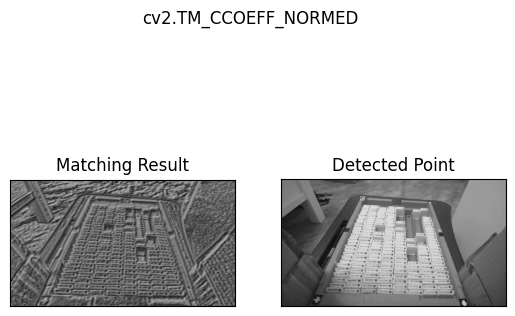

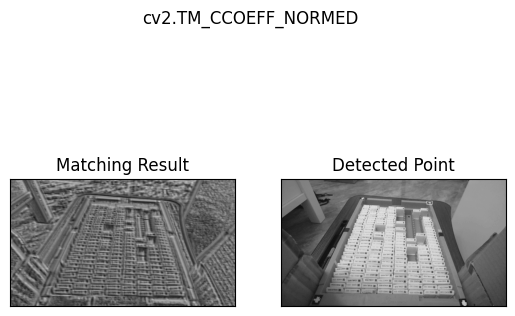

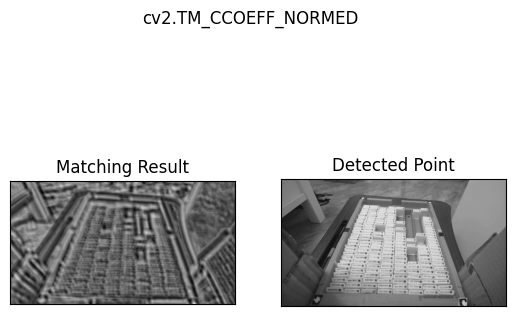

AttributeError: 'NoneType' object has no attribute 'shape'

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지와 템플릿 로드
images = ['../images/img8.jpg']
templates = ['../template/t11.png', '../template/t12.png', '../template/t13.png', '../template/t14.png']

methods = ['cv2.TM_CCOEFF_NORMED']

for img_path in images:
    img = cv2.imread(img_path,0)
    img2 = img.copy()

    for temp in templates:
        template = cv2.imread(temp,0)
        w, h = template.shape[::-1]

        for meth in methods:
            img = img2.copy()
            method = eval(meth)

            # 템플릿 매칭 수행
            res = cv2.matchTemplate(img,template,method)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

            # TM_SQDIFF, TM_SQDIFF_NORMED의 경우 최소값이 가장 좋은 매칭, 나머지는 최대값이 가장 좋은 매칭
            if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
                top_left = min_loc
            else:
                top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)

            # 매칭된 부분을 사각형으로 표시
            cv2.rectangle(img,top_left, bottom_right, 255, 2)

            # 매칭 점수가 임계값 이상인 위치를 찾아 해당 위치에 사각형을 그립니다.
            threshold = 0.98
            loc = np.where(res >= threshold)
            for pt in zip(*loc[::-1]):
                cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

            plt.subplot(121),plt.imshow(res,cmap = 'gray')
            plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
            plt.subplot(122),plt.imshow(img,cmap = 'gray')
            plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
            plt.suptitle(meth)

            plt.show()
